In [6]:
%matplotlib widget
%load_ext autoreload
%autoreload 2
import os  
import sys  
sys.path.insert(0, os.getenv('HOME')+'/pycode/MscThesis/')
from amftrack.pipeline.functions.post_processing.extract_study_zone import *
import pandas as pd
import ast
from amftrack.plotutil import plot_t_tp1
from scipy import sparse
from datetime import datetime
import pickle
import scipy.io as sio
from pymatreader import read_mat
from matplotlib import colors
import cv2
import imageio
import matplotlib.pyplot as plt
import numpy as np
from skimage.filters import frangi
from skimage import filters
from random import choice
import scipy.sparse
import os
from skimage.feature import hessian_matrix_det
from amftrack.notebooks.analysis.util import * 
from scipy import stats
from scipy.ndimage.filters import uniform_filter1d
from collections import Counter
from IPython.display import clear_output
from amftrack.notebooks.analysis.data_info import *
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
plt.rcParams.update({
    "font.family": "verdana",
'font.weight' : 'normal',
'font.size': 20})
from amftrack.plotutil import plot_node_skel
from amftrack.notebooks.validation.util import *
from amftrack.util.sys import *
import pickle
from amftrack.pipeline.functions.post_processing.extract_study_zone import load_study_zone
from amftrack.pipeline.functions.post_processing.time_hypha import *
from amftrack.pipeline.functions.image_processing.experiment_class_surf import Experiment, save_graphs, load_graphs, load_skel
from amftrack.pipeline.functions.image_processing.experiment_class_surf import Edge
from amftrack.pipeline.functions.post_processing.area_hulls import *

from shapely.geometry import Polygon, shape,Point
from shapely.affinity import affine_transform, rotate
from scipy import spatial
import geopandas as gpd
from matplotlib import cm
import matplotlib as mpl


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import sys
from amftrack.util.sys import (
    update_analysis_info,
    get_analysis_info,)
from amftrack.pipeline.launching.run_super import run_parallel_post
from amftrack.pipeline.functions.post_processing.global_plate import *
from amftrack.pipeline.functions.post_processing.time_plate import *
from amftrack.pipeline.functions.post_processing.global_hypha import *
from amftrack.pipeline.functions.post_processing.area_hulls import *
from amftrack.pipeline.launching.run_super import run_parallel,run_launcher

directory = os.path.join(directory_scratch,'stitch_temp')+'/'
update_analysis_info(directory)
analysis_info = get_analysis_info(directory)
plates = ['1053_20220413']
select = analysis_info.loc[analysis_info['unique_id'].isin(plates)]


In [86]:
exp.folders['total_path']

0     /scratch-shared/amftrack/stitch_temp/20220415_...
1     /scratch-shared/amftrack/stitch_temp/20220415_...
2     /scratch-shared/amftrack/stitch_temp/20220415_...
3     /scratch-shared/amftrack/stitch_temp/20220415_...
4     /scratch-shared/amftrack/stitch_temp/20220415_...
                            ...                        
80    /scratch-shared/amftrack/stitch_temp/20220423_...
81    /scratch-shared/amftrack/stitch_temp/20220423_...
82    /scratch-shared/amftrack/stitch_temp/20220423_...
83    /scratch-shared/amftrack/stitch_temp/20220424_...
84    /scratch-shared/amftrack/stitch_temp/20220425_...
Name: total_path, Length: 85, dtype: object

In [11]:
directory = directory_project
# update_analysis_info(directory)
# directory = '/projects/0/einf914/agg/'

analysis_info = get_analysis_info(directory)
# analysis_info['Plate']=analysis_info['Plate'].fillna(758)
select = analysis_info

In [3]:
plate = '1053'
rows = [row for (index, row) in select.iterrows()]
for index,row in enumerate(rows):
    path = f'{directory}{row["folder_analysis"]}'
    try:
        a = np.load(f'{path}/center.npy')
    except:
        print(index,row["Plate"])
    if row["Plate"]== plate:
        path_exp = f'{directory}{row["path_exp"]}'
        exp = pickle.load(open(path_exp, "rb"))
        exp.dates.sort()
        break

0 1053


In [5]:
load_study_zone(exp)
exp.labeled = True
load_graphs(exp,indexes = [0])

In [7]:
%load_ext autoreload
%autoreload 2
ts = range(exp.ts)
incr = 100
regular_hulls,indexes = get_regular_hulls_area_fixed(exp,ts,100)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
0 10 67871152.5
1 12 45589088.0
2 11 79267400.0
3 11 89298971.5
4 12 98317172.0
5 9 101924555.0
6 12 111395663.5
7 10 116835863.71707685
8 11 123402388.0
9 10 129626715.0
10 14 136629988.43553057
11 8 150680989.0
12 8 157578122.5
13 8 165252437.5
14 7 173486202.0
15 6 181275460.5
16 7 188765607.0
17 8 195903162.5
18 6 204689539.5
19 7 212411307.0
20 9 219539754.0
21 7 222878491.0
22 7 228670415.0
23 7 234155755.0
24 8 243055954.5
25 7 252224135.0
26 7 259654804.0
27 7 267293228.0
28 7 274831857.0
29 5 283051233.0
30 7 291039758.5
31 7 298499681.5
32 7 310987774.5
33 5 318765358.5
34 6 327379680.5
35 5 337200839.0
36 5 344344270.0
37 5 352267553.5
38 5 358345920.5
39 6 367540561.837213
40 6 375995991.62317395
41 6 382772290.6684039
42 6 389649401.78694946
43 7 392394250.9864649
44 5 403899903.5
45 5 413815964.5
46 6 429747576.5
47 7 437158015.5
48 7 454223631.5
49 7 468483183.0
50 6 484185025.0
51 6 

In [36]:
regular_hulls = get_hulls(exp,ts)

0 10 67871152.5
1 12 45589088.0
2 11 79267400.0
3 11 89298971.5
4 12 98317172.0
5 9 101924555.0
6 12 111395663.5
7 10 116835863.71707685
8 11 123402388.0
9 10 129626715.0
10 14 136629988.43553057
11 8 150680989.0
12 8 157578122.5
13 8 165252437.5
14 7 173486202.0
15 6 181275460.5
16 7 188765607.0
17 8 195903162.5
18 6 204689539.5
19 7 212411307.0
20 9 219539754.0
21 7 222878491.0
22 7 228670415.0
23 7 234155755.0
24 8 243055954.5
25 7 252224135.0
26 7 259654804.0
27 7 267293228.0
28 7 274831857.0
29 5 283051233.0
30 7 291039758.5
31 7 298499681.5
32 7 310987774.5
33 5 318765358.5
34 6 327379680.5
35 5 337200839.0
36 5 344344270.0
37 5 352267553.5
38 5 358345920.5
39 6 367540561.837213
40 6 375995991.62317395
41 6 382772290.6684039
42 6 389649401.78694946
43 7 392394250.9864649
44 5 403899903.5
45 5 413815964.5
46 6 429747576.5
47 7 437158015.5
48 7 454223631.5
49 7 468483183.0
50 6 484185025.0
51 6 493071934.0
52 10 443373129.25217515
53 8 459455674.29025376
54 11 452712545.69294596
55

In [55]:
exp.folders.iloc[ts]

,total_path,Plate,PrincePos,root,strain,medium,split,Pbait,CrossDate,Temperature,...,/Analysis/transform_corrupt.mat,/Analysis/skeleton_realigned_compressed.mat,/Analysis/nx_graph_pruned.p,/Analysis/nx_graph_pruned_width.p,/Analysis/nx_graph_pruned_labeled.p,date,folder,Temp,unique_id,datetime
0,/scratch-shared/amftrack/stitch_temp/20220415_...,1053,7,'Carrot','C2','001P100N200C','Y','-',20220413,25,...,False,True,True,True,True,"15.04.2022, 13:43:",20220415_1343_Plate07,NaN,1053_20220413,2022-04-15 13:43:00
1,/scratch-shared/amftrack/stitch_temp/20220415_...,1053,7,'Carrot','C2','001P100N200C','Y','-',20220413,25,...,False,True,True,True,True,"15.04.2022, 15:42:",20220415_1542_Plate07,NaN,1053_20220413,2022-04-15 15:42:00
2,/scratch-shared/amftrack/stitch_temp/20220415_...,1053,7,'Carrot','C2','001P100N200C','Y','-',20220413,25,...,False,True,True,True,True,"15.04.2022, 17:42:",20220415_1742_Plate07,NaN,1053_20220413,2022-04-15 17:42:00
3,/scratch-shared/amftrack/stitch_temp/20220415_...,1053,7,'Carrot','C2','001P100N200C','Y','-',20220413,25,...,False,True,True,True,True,"15.04.2022, 21:42:",20220415_2142_Plate07,NaN,1053_20220413,2022-04-15 21:42:00
4,/scratch-shared/amftrack/stitch_temp/20220415_...,1053,7,'Carrot','C2','001P100N200C','Y','-',20220413,25,...,False,True,True,True,True,"15.04.2022, 23:42:",20220415_2342_Plate07,NaN,1053_20220413,2022-04-15 23:42:00
5,/scratch-shared/amftrack/stitch_temp/20220416_...,1053,7,'Carrot','C2','001P100N200C','Y','-',20220413,25,...,False,True,True,True,True,"16.04.2022, 01:42:",20220416_0142_Plate07,NaN,1053_20220413,2022-04-16 01:42:00
6,/scratch-shared/amftrack/stitch_temp/20220416_...,1053,7,'Carrot','C2','001P100N200C','Y','-',20220413,25,...,False,True,True,True,True,"16.04.2022, 03:42:",20220416_0342_Plate07,NaN,1053_20220413,2022-04-16 03:42:00
7,/scratch-shared/amftrack/stitch_temp/20220416_...,1053,7,'Carrot','C2','001P100N200C','Y','-',20220413,25,...,False,True,True,True,True,"16.04.2022, 05:42:",20220416_0542_Plate07,NaN,1053_20220413,2022-04-16 05:42:00
8,/scratch-shared/amftrack/stitch_temp/20220416_...,1053,7,'Carrot','C2','001P100N200C','Y','-',20220413,25,...,False,True,True,True,True,"16.04.2022, 07:42:",20220416_0742_Plate07,NaN,1053_20220413,2022-04-16 07:42:00
9,/scratch-shared/amftrack/stitch_temp/20220416_...,1053,7,'Carrot','C2','001P100N200C','Y','-',20220413,25,...,False,True,True,True,True,"16.04.2022, 09:42:",20220416_0942_Plate07,NaN,1053_20220413,2022-04-16 09:42:00


In [19]:
def make_hull_images(exp,ts_plot):
    """
    This function makes images centered on the initial position of some random nodes,
    plots the skeleton on top of the raw image, the label of the nodes at different timesteps
    it returns the paths_list of those plotted image in the format for tile video making
    :param exp:
    :param num_tiles: number of such images to tile together
    """
    ts = range(exp.ts-60)
    incr = 100
    regular_hulls, indexes = get_regular_hulls_area_fixed(exp, ts, incr)
    paths_list = []
    for t in ts_plot:
        path = f"plot_nodes_{time_ns()}.png"
        path = os.path.join(temp_path, path)
        plot_hulls_skelet(exp, t, regular_hulls, save_path=path)
        paths_list.append([path])
    return(paths_list)

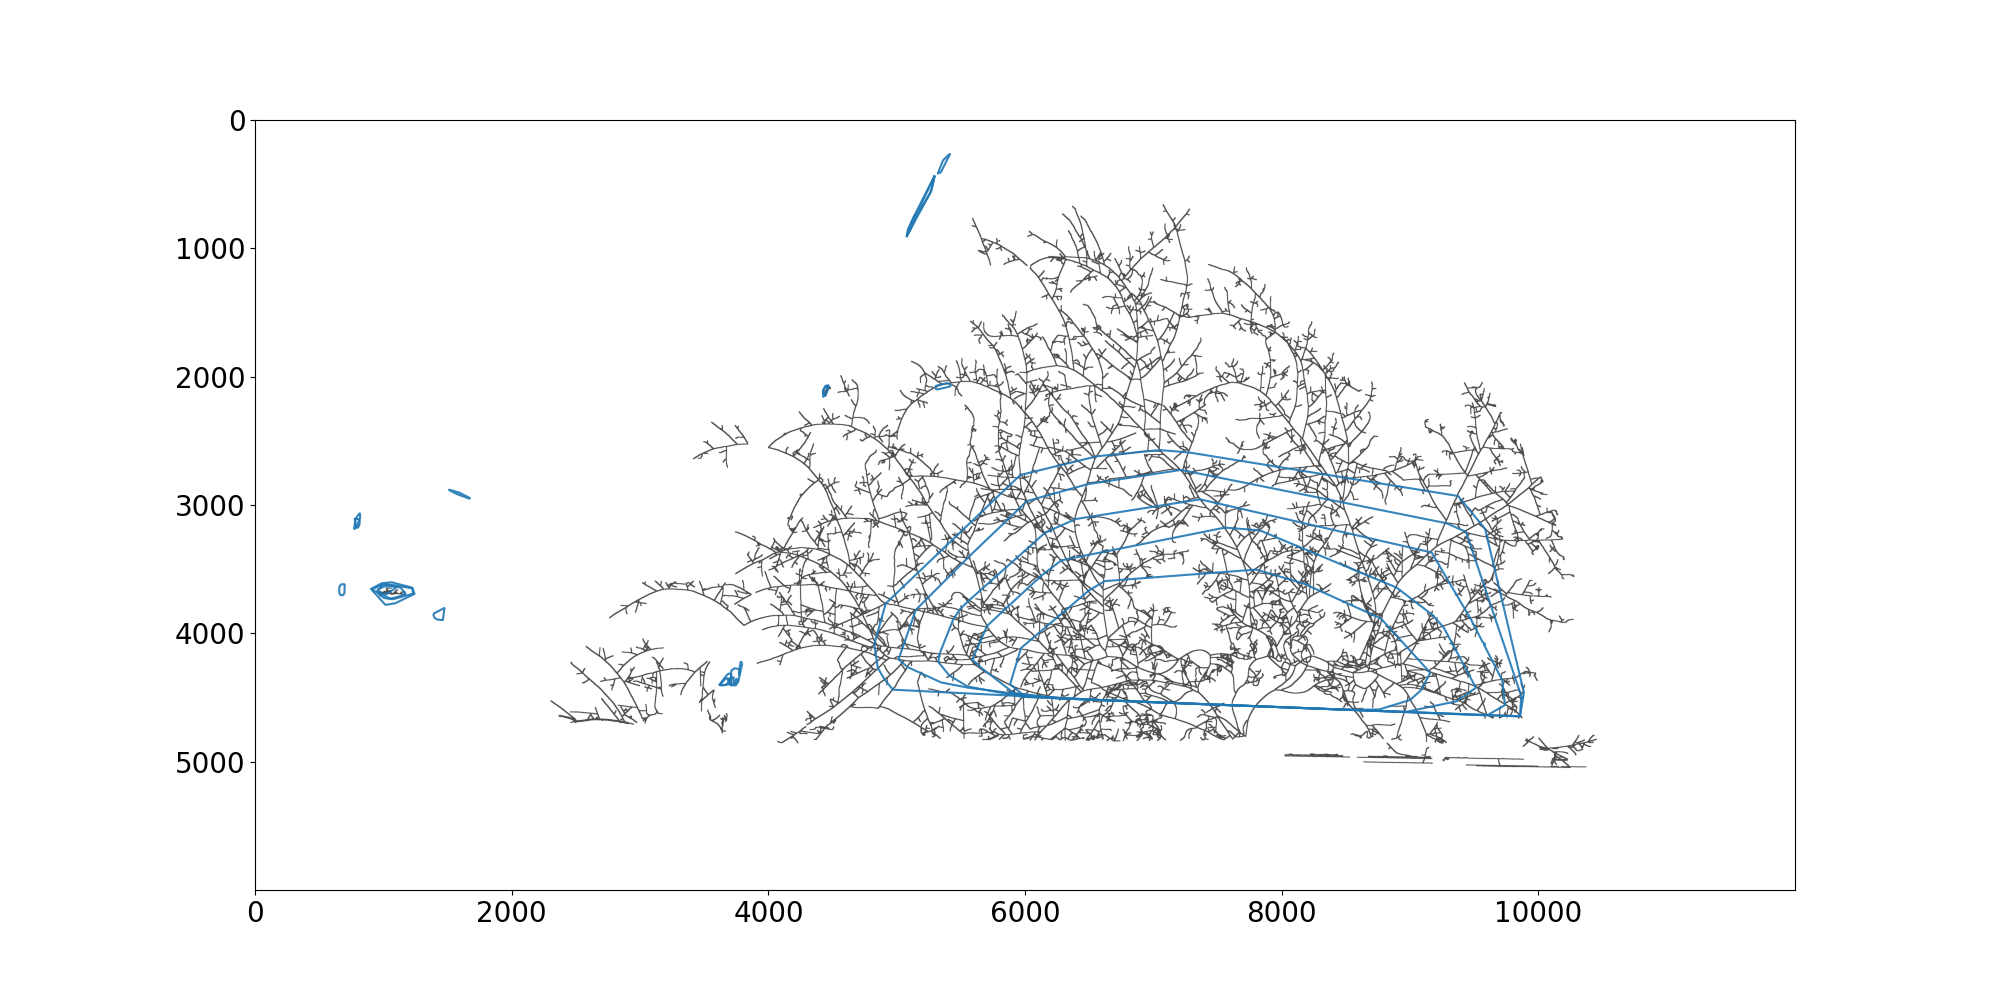

In [20]:
paths_list = make_hull_images(exp,range(exp.ts-30))

In [30]:
def make_video_tile(paths_list,texts,resize,save_path=None,upload_path=None,fontScale=3,color = (0, 255, 255)):
    """
    This function makes a video out of a list of list of paths.
    paths_list is of the form [['path1','path2','path3','path4'],['path5','path6','path7','path8']...]
    where 'path1','path2','path3','path4' correspond to the path of images
    of a single timesteps that one want to tile together.
    If odd number they will all be arranged horizontally
    If even number they will be arranged in 2 columns.
    The final images of the movie are returned
    :param texts: a text list of the same dimension as the paths_list to indicate texts
    to be written at the top left of the single image of the tile
    :param resize: a format in which to resize each individual image of the tile
    :save_path: the path where to save the final movie, if None, the final movie is not saved
    :upload_path: the dropbox format path to upload the movie, if None it's not uploaded
    :fontScale: the font of the text
    :color: the color of the text
    """
    if resize is None:
        imgs_list = [[cv2.imread(path, cv2.IMREAD_COLOR) for path in paths] for paths in paths_list]
    else:
        imgs_list = [[cv2.resize(cv2.imread(path, cv2.IMREAD_COLOR),resize) for path in paths] for paths in paths_list]
    for i,imgs in enumerate(imgs_list):
        for j,img in enumerate(imgs):
            anchor =img.shape[0]//10,img.shape[1]//10
            cv2.putText(img=img, text=texts[i][j],org = anchor, fontFace=cv2.FONT_HERSHEY_TRIPLEX, fontScale=fontScale, color=color,thickness=3)
    if len(imgs_list[0])%2==0:
        imgs_final = [[cv2.vconcat(imgs[::2]),cv2.vconcat(imgs[1::2])] for imgs in imgs_list]
        imgs_final = [cv2.hconcat(imgs) for imgs in imgs_final]
    elif len(imgs_list[0])==1:
        imgs_final = [imgs[0] for imgs in imgs_list]
    else:
        imgs_final = [cv2.hconcat(imgs) for imgs in imgs_list]
    if not save_path is None:
        imageio.mimsave(save_path, imgs_final)
    if not upload_path is None:
        if save_path is None:
            time = time_ns()
            save_path_temp = os.path.join(temp_path,f'{time}.mp4')
            imageio.mimsave(save_path_temp, imgs_final)
        else:
            save_path_temp = save_path
        upload(save_path_temp,upload_path)
        if save_path is None:
            os.remove(save_path_temp)
    return(imgs)

In [31]:
# from amftrack.util.video_util import make_hull_images,make_video_tile

dir_drop = "DATA/PRINCE"
id_unique = exp.unique_id
texts = [[folder] for folder in list(exp.folders['folder'])]
folder_analysis = exp.save_location.split('/')[-1]
upload_path = f"/{dir_drop}/{id_unique}/{folder_analysis}/{id_unique}_hulls.mp4"
print(upload_path)
make_video_tile(paths_list, texts, None, save_path=None, upload_path=upload_path, fontScale=3)

/DATA/PRINCE/1053_20220413/Analysis_1053_20220413_85_Version1/1053_20220413_hulls.mp4
1
2022-06-30 18:07:12,634-[WARNING]- imageio_ffmpeg:432 -> IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (2000, 1000) to (2000, 1008) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).
2022-06-30 18:07:17,449-[INFO]- dropbox:388 -> Refreshing access token.
2022-06-30 18:07:17,705-[INFO]- dropbox:477 -> Request to files/upload


[array([[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        ...,
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
  

In [83]:
folder_analysis = exp.save_location.split('/')[-1]

'Analysis_1053_20220413_85_Version1'

2022-06-30 22:49:15,132-[WARNING]- matplotlib.font_manager:1352 -> findfont: Font family ['verdana'] not found. Falling back to DejaVu Sans.


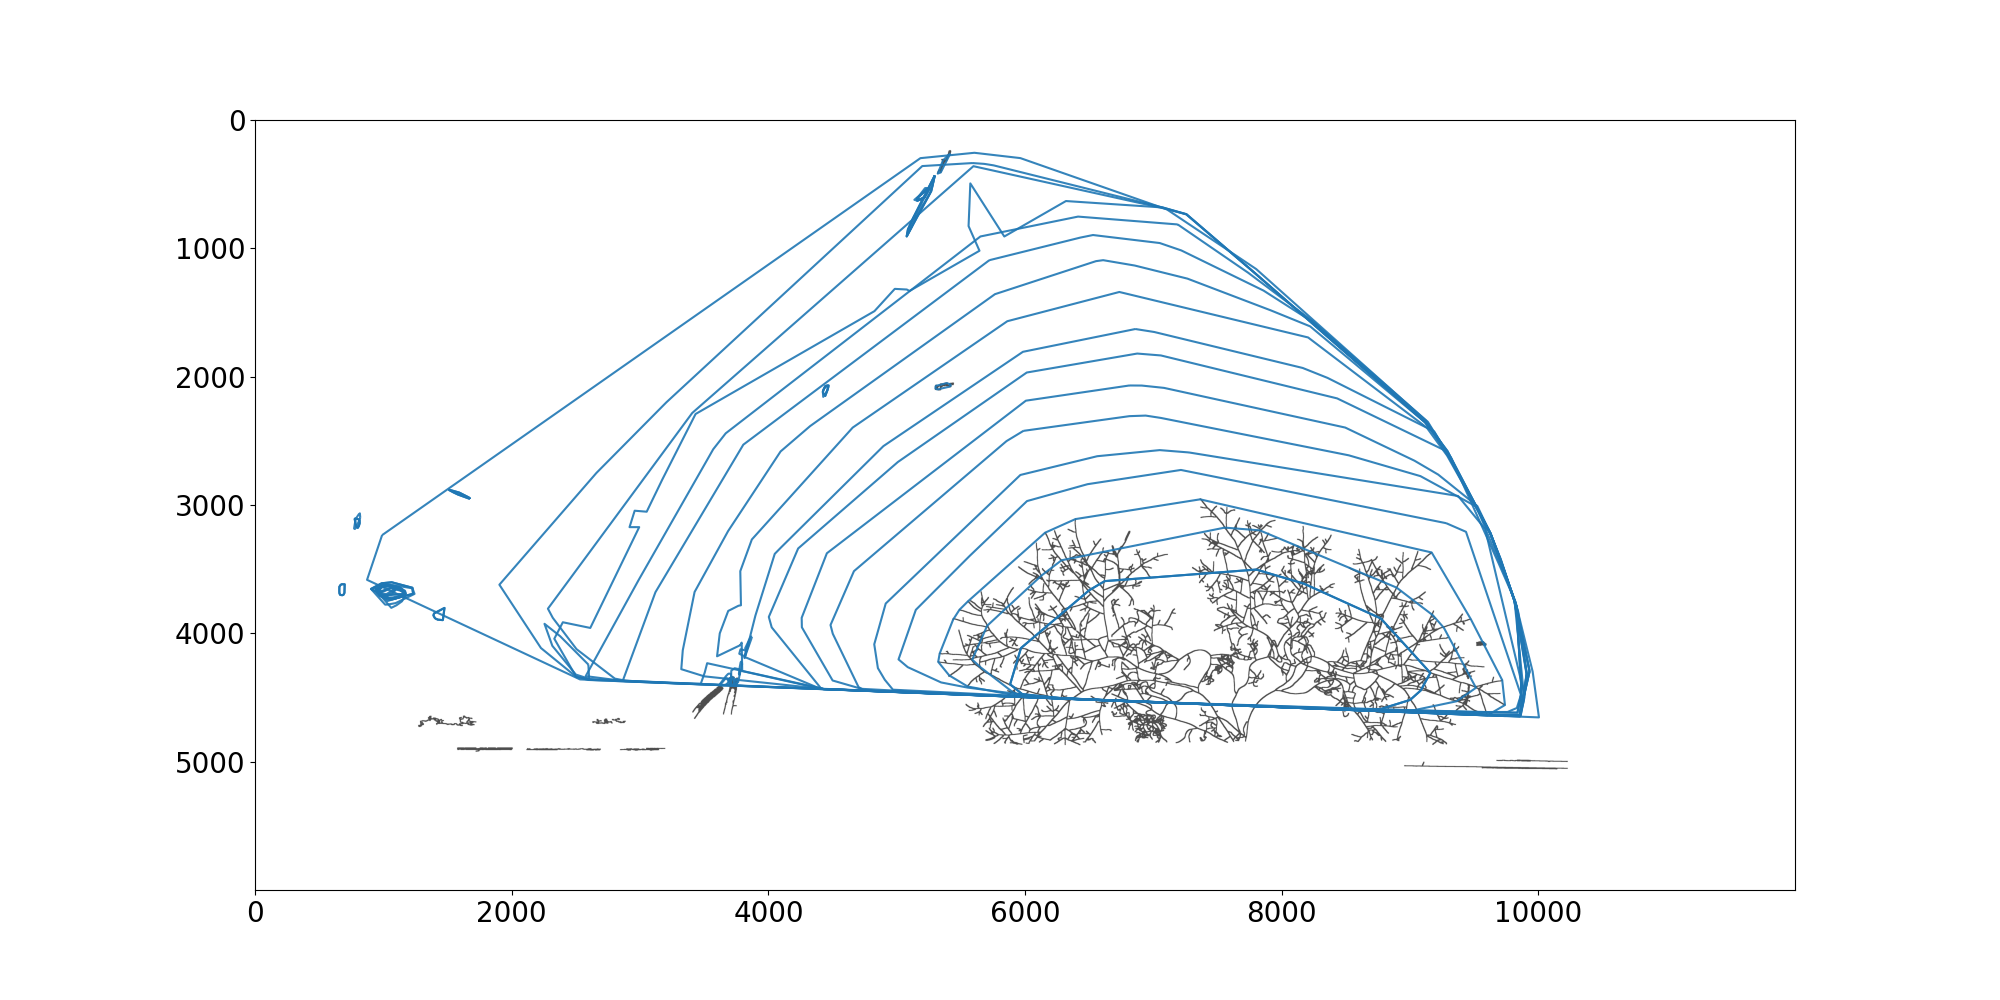

In [8]:
plt.close("all")
my_cmap = cm.Greys

fig,ax = plt.subplots(figsize = (20,10))
# ax = fig.add_subplot(111)
skels = []
ims = []
kernel = np.ones((5,5),np.uint8)
itera = 2
folders = list(exp.folders['folder'])
folders.sort()
t = 10
for folder in folders[t:t+1]:
    directory_name=folder
    path_snap=directory+directory_name
    skel_info = read_mat(path_snap+'/Analysis/skeleton_realigned_compressed.mat')
    skel = skel_info['skeleton']
    skels.append(cv2.dilate(skel.astype(np.uint8),kernel,iterations = itera))
ax.imshow(skels[0],cmap=my_cmap,interpolation =None,alpha = 0.7)

for polygon in regular_hulls:
    p = affine_transform(polygon,[0.2,0,0,-0.2,0,0])
    p = rotate(p,90,origin=(0,0))
    p =gpd.GeoSeries(p)
    _ = p.boundary.plot(ax =ax,alpha = 0.9)
    # _ = ax.plot(np.array(y)/5,np.array(x)/5)
polygon = regular_hulls[0]
p = affine_transform(polygon,[0.2,0,0,-0.2,0,0])
p = rotate(p,90,origin=(0,0))
p =gpd.GeoSeries(p)
_ = p.boundary.plot(ax =ax)

# plt.savefig('path.png')


In [11]:
i = 8
t = 10
for i in range(10):
    print(get_length_in_ring(regular_hulls[i],regular_hulls[i+1],t,exp))

271870.2007100152
140677.00578669837
9563.96055332908
0.0
0.0
0.0
0.0
0.0
4925.369963275487
0.0


In [13]:
def plot_hulls_skelet(exp,t,hulls,save_path='',close=True):
    if close:
        plt.close('all')
    my_cmap = cm.Greys
    fig, ax = plt.subplots(figsize=(20, 10))
    skels = []
    ims = []
    kernel = np.ones((5,5),np.uint8)
    itera = 2
    folders = list(exp.folders['total_path'])
    folders.sort()
    for folder in folders[t:t+1]:
        path_snap=folder
        skel_info = read_mat(path_snap+'/Analysis/skeleton_realigned_compressed.mat')
        skel = skel_info['skeleton']
        skels.append(cv2.dilate(skel.astype(np.uint8),kernel,iterations = itera))
    ax.imshow(skels[0], cmap=my_cmap, interpolation=None, alpha=0.7)
    for polygon in hulls:
        p = affine_transform(polygon,[0.2,0,0,-0.2,0,0])
        p = rotate(p,90,origin=(0,0))
        p =gpd.GeoSeries(p)
        try:
            _ = p.boundary.plot(ax =ax,alpha = 0.9)
        except ValueError:
            print(p)
        # _ = ax.plot(np.array(y)/5,np.array(x)/5)
    if save_path != '':
        plt.savefig(save_path)

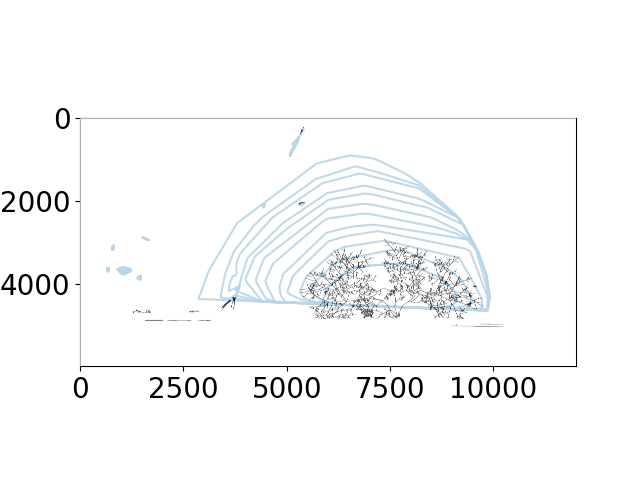

In [67]:
plot_hulls_skelet(exp,5,regular_hulls)

In [20]:
args = {"incr": 100, "i": 0, "rh_only": True}

In [21]:
get_density_in_ring(exp, 0, args)

('ring_density_incr-100_index-0', None)

In [7]:
np.save('regular_hulls',regular_hulls)

/home/cbisot/miniconda3/envs/amftrack/lib/python3.7/site-packages/numpy/lib/npyio.py:528: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  arr = np.asanyarray(arr)
/home/cbisot/miniconda3/envs/amftrack/lib/python3.7/site-packages/numpy/lib/npyio.py:528: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


/home/cbisot/miniconda3/envs/amftrack/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("Greys").copy()
  import sys


(166.70999999999998, 7296.6900000000005, 1176.5300000000002, 4649.67)

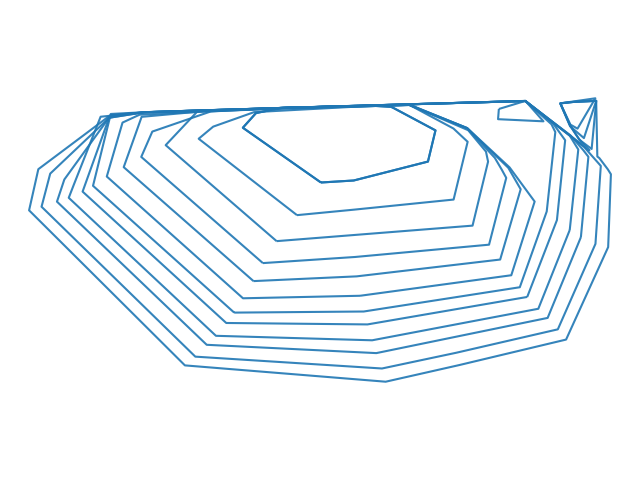

In [8]:
# time_plate_info, global_hypha_info, time_hypha_info = get_data_tables(124,redownload=True)
# table = time_plate_info.loc[time_plate_info["Plate"]==int(plate)]
# table = table.fillna(-1)
# table= table.set_index('t')

my_cmap = cm.Greys
my_cmap.set_under('k', alpha=0)
num_hulls = len(regular_hulls)-4

t = 80
fig = plt.figure()
ax = fig.add_subplot(111)
skels = []
ims = []
kernel = np.ones((5,5),np.uint8)
itera = 2
folders = list(exp.folders['folder'])
folders.sort()
for folder in folders[t:t+1]:
    directory_name=folder
    path_snap=directory+directory_name
    skel_info = read_mat(path_snap+'/Analysis/skeleton_realigned_compressed.mat')
    skel = skel_info['skeleton']
    skels.append(cv2.dilate(skel.astype(np.uint8),kernel,iterations = itera))
for index in range(num_hulls):
    polygon = regular_hulls[num_hulls-1-index]
    column = f"ring_density_incr-100_index-{num_hulls-1-index}"
    p = affine_transform(polygon,[0.2,0,0,-0.2,0,0])
    p = rotate(p,90,origin=(0,0))
    density = table[column][t]
    if density !=-1:
        p =gpd.GeoSeries(p)
        _ = p.boundary.plot(ax =ax,alpha = 0.9)
    # _ = ax.plot(np.array(y)/5,np.array(x)/5)
polygon = regular_hulls[0]
column = f"ring_density_incr-100_index-{num_hulls-1-index}"
p = affine_transform(polygon,[0.2,0,0,-0.2,0,0])
p = rotate(p,90,origin=(0,0))
p =gpd.GeoSeries(p)
_ = p.boundary.plot(ax =ax)
norm = mpl.colors.Normalize(vmin=0, vmax=3000)
# fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cm.cool), ax=ax,orientation='horizontal')
# ax.imshow(skels[0],vmin=0.00000001,cmap=my_cmap,zorder=30,interpolation =None)
# right = 0.90
# top = 0.90
# fontsize = 10
# text = ax.text(
# right,
# top,
# f"time = {int(table['time_since_begin'][t])}h",
# horizontalalignment="right",
# verticalalignment="bottom",
# transform=ax.transAxes,
# color="white",
# fontsize = fontsize,
# )
plt.axis('off')
plt.gca().set_position([0, 0, 1, 1])
plt.savefig(f'fig{t}.svg')

In [11]:
%autoreload 2

hulls = get_hulls(exp,ts)
areas = [hull.area* 1.725**2/(1000**2) for hull in hulls]
areas[:60]

0 5 579885320.5493792
1 6 409663764.64496917
2 1 308301075.5
3 2 324605291.5
4 2 342163676.0
5 2 355274886.5
6 2 364982542.0
7 2 381802502.0
8 2 394617085.0
9 3 412579253.5
10 4 425909355.9062053
11 5 435261840.64812076
12 5 446667097.45790935
13 6 445958205.3114626
14 7 438823850.9786435
15 3 67157030.95083028
16 1 105253295.5
17 2 67835310.0
18 2 75298112.0
19 3 83686387.5
20 3 106246947.91919945
21 3 115251402.02277026
22 2 168567905.0
23 2 182711661.0
24 2 195974710.5
25 2 208457230.0
26 2 219917277.5
27 2 228910993.5
28 2 238402441.5
29 1 239686507.5
30 2 252006917.5
31 2 266601940.5
32 2 278945084.5
33 1 288711669.0
34 5 579885320.5493792
35 6 409663764.64496917
36 2 324605291.5
37 2 342163676.0
38 2 355274886.5
39 2 364982542.0
40 2 381802502.0
41 2 394617085.0
42 3 412579253.5
43 4 425909355.9062053
44 5 435261840.64812076
45 5 446667097.45790935
46 6 445958205.3114626
47 7 438823850.9786435


[1725.5212569597468,
 1219.0057396716866,
 917.3883877846877,
 965.9036205196877,
 1018.1507883975002,
 1057.1648341415628,
 1086.0511765387503,
 1136.1010700137501,
 1174.2324635531252,
 1227.6811411959377,
 1267.3465271684022,
 1295.1760145785645,
 1329.1137818731916,
 1327.0043846799208,
 1305.7752215683263,
 199.8341402230644,
 313.1943374221876,
 201.85244431875003,
 224.05894452000004,
 249.01930680468752,
 316.1510744020679,
 342.94495314400575,
 501.5948723156251,
 543.6813862631251,
 583.1472479315626,
 620.2905450187501,
 654.3913488609376,
 681.1532750334376,
 709.3962649884377,
 713.2171638796875,
 749.8780838859376,
 793.3073992003126,
 830.0359670653127,
 859.0976600681252,
 1725.5212569597468,
 1219.0057396716866,
 965.9036205196877,
 1018.1507883975002,
 1057.1648341415628,
 1086.0511765387503,
 1136.1010700137501,
 1174.2324635531252,
 1227.6811411959377,
 1267.3465271684022,
 1295.1760145785645,
 1329.1137818731916,
 1327.0043846799208,
 1305.7752215683263]

In [8]:
%autoreload 2

i=0
t=10
if i+2<=len(regular_hulls):
    hull1,hull2 = regular_hulls[i],regular_hulls[i+1]
    hyphae_ring = get_hyphae_in_ring(hull1,hull2,t,exp)
    hyphae_ring = [hyph.end.label for hyph in hyphae_ring]

In [9]:
hyphae_ring

NameError: name 'hyphae_ring' is not defined

In [33]:
plate = exp.folders['Plate'].unique()[0]
time_plate_info, global_hypha_info, time_hypha_info = get_data_tables(124,redownload=False)
table = global_hypha_info.loc[global_hypha_info['Plate']==plate].copy()
table['log_length'] = np.log10((table['tot_length_C'] + 1).astype(float))
table['is_rh'] = (table['log_length'] >= 3.36).astype(int)
table = table.set_index('hypha')

In [34]:
rh_only = True
hyphaes = table.loc[(table['strop_track']>=t)&(table['timestep_init_growth']<=t)&
                        ((table['out_of_ROI'].isnull())|(table['out_of_ROI']>t))]
if rh_only:
    selection_hypha = hyphaes.loc[(hyphaes['is_rh'] == 1)].index

else:
    selection_hypha = hyphaes
nodes = get_nodes_in_ring(hull1,hull2,t,exp)
tips = [node for node in nodes if node.degree(t) == 1 and node.is_in(t+1)
        and len(node.ts())>2]
growing_tips = [node.label for node in tips if np.linalg.norm(node.pos(t)-node.pos(node.ts()[-1]))>=40]

In [35]:
growing_tips

[142,
 1958,
 3472,
 3488,
 4038,
 4055,
 4673,
 5260,
 5316,
 5318,
 5518,
 5913,
 5928,
 5929,
 5941,
 5951,
 5983,
 6168]

In [36]:
select_time = time_hypha_info.loc[time_hypha_info['Plate']==plate]
rh_ring = select_time.loc[(select_time['end'].isin(selection_hypha))&(select_time['end'].isin(hyphae_ring))
                           &(select_time['end'].isin(growing_tips))&(select_time['timestep']==t)
                           &(select_time['speed']>=50)]
rh_ring = select_time.loc[(select_time['end'].isin(selection_hypha))&(select_time['end'].isin(hyphae_ring))&(select_time['end'].isin(growing_tips))]
rh_ring

,end,distance_final_pos,timedelta,time_since_emergence,speed,timestep,timestep_init,time_init,degree,width_tip_edge,...,time_since_begin_exp,tot_length_C,absolute_angle,width_root_edge,Plate,folder,t,density_window500,density_window1000,density_window2000
142,142,2396.87,2,0,0,0,0,0,1,None,...,0,4284.59,-111.413,NaN,808,Analysis_1636047796407701153_0_100_Version9,0,1354.2,677.681,348.261
142,142,2214.54,2,2,0,1,0,0,1,None,...,2,4834.39,-106.788,NaN,808,Analysis_1636047796407701153_0_100_Version9,1,1280,655.072,340.435
142,142,2044.35,2,4,0,2,0,0,1,None,...,4,5362.14,-101.271,NaN,808,Analysis_1636047796407701153_0_100_Version9,2,1235.94,634.783,331.449
142,142,1901.24,2,6,0,3,0,0,1,None,...,6,5867.6,NaN,NaN,808,Analysis_1636047796407701153_0_100_Version9,3,1217.39,619.71,327.536
1958,1958,7797.33,2,0,120.118,3,3,6,1,5.63484,...,6,197.053,NaN,NaN,808,Analysis_1636047796407701153_0_100_Version9,3,2847.54,2043.48,1131.59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1958,1958,1.41421,2,111.733,0,48,3,6,3,6.81393,...,117.733,14324,NaN,NaN,808,Analysis_1636047796407701153_0_100_Version9,48,6796.52,5097.39,4341.59
1958,1958,12.2066,1.96667,113.733,9.4554,49,3,6,4,6.96862,...,119.733,14257.8,NaN,NaN,808,Analysis_1636047796407701153_0_100_Version9,49,6638.84,5017.39,4346.52
1958,1958,6.32456,2.03333,115.7,3.05881,50,3,6,3,6.51164,...,121.7,14279.8,NaN,NaN,808,Analysis_1636047796407701153_0_100_Version9,50,6555.36,NaN,NaN
1958,1958,3.16228,2.01667,117.733,0,51,3,6,3,6.99511,...,123.733,14290.6,NaN,NaN,808,Analysis_1636047796407701153_0_100_Version9,51,6745.51,NaN,NaN


In [11]:
# path_save = f'/scratch-shared/amftrack/temp/time_plate_infos_agg.pick'
path_save = f'/scratch-shared/amftrack/temp/time_plate_infos.pick'

dir_drop = 'data_tables'

API = str(np.load(os.getenv('HOME')+'/pycode/API_drop.npy'))
# download(API,f'/{dir_drop}/time_plate_infos_agg.pick',path_save)
download(API,f'/{dir_drop}/time_plate_infos.pick',path_save)

time_plate_info = pd.read_pickle(path_save)
# time_plate_info['Plate'] = time_plate_info['Plate'].fillna(758)


In [7]:
plt.close("all")
from matplotlib import cm
import matplotlib as mpl
plate = row["Plate"]
table = time_plate_info.loc[time_plate_info["Plate"]==plate]
table = table.fillna(-1)
my_cmap = cm.Greys
my_cmap.set_under('k', alpha=0)
table= table.set_index('t')
num_hulls = len(regular_hulls)-4
for t in ts:
    fig = plt.figure()
    ax = fig.add_subplot(111)
    skels = []
    ims = []
    kernel = np.ones((5,5),np.uint8)
    itera = 2
    folders = list(exp.folders['folder'])
    folders.sort()
    for folder in folders[t:t+1]:
        directory_name=folder
        path_snap=directory+directory_name
        skel_info = read_mat(path_snap+'/Analysis/skeleton_realigned_compressed.mat')
        skel = skel_info['skeleton']
        skels.append(cv2.dilate(skel.astype(np.uint8),kernel,iterations = itera))
    for index in range(num_hulls):
        polygon = regular_hulls[num_hulls-1-index]
        column = f"ring_density_incr-100_index-{num_hulls-1-index}"
        p = affine_transform(polygon,[0.2,0,0,-0.2,0,0])
        p = rotate(p,90,origin=(0,0))
        density = table[column][t]
        if density !=-1:
            p =gpd.GeoSeries(p)
            _ = p.plot(ax =ax,color = cm.cool(density/5000),alpha = 0.9)
        # _ = ax.plot(np.array(y)/5,np.array(x)/5)
    polygon = regular_hulls[0]
    column = f"ring_density_incr-100_index-{num_hulls-1-index}"
    p = affine_transform(polygon,[0.2,0,0,-0.2,0,0])
    p = rotate(p,90,origin=(0,0))
    p =gpd.GeoSeries(p)
    _ = p.plot(ax =ax,color = "black")
    norm = mpl.colors.Normalize(vmin=0, vmax=3000)
    fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cm.cool), ax=ax,orientation='horizontal')
    ax.imshow(skels[0],vmin=0.00000001,cmap=my_cmap,zorder=30,interpolation =None)
    right = 0.90
    top = 0.90
    fontsize = 10
    text = ax.text(
    right,
    top,
    f"time = {int(table['time_since_begin'][t])}h",
    horizontalalignment="right",
    verticalalignment="bottom",
    transform=ax.transAxes,
    color="white",
    fontsize = fontsize,
)
    save = f'/scratch-shared/amftrack/temp/im{t}'
    plt.savefig(save)
    plt.close(fig)
    # break
# regular_hulls[1].scale(0.5,0.5).plot()

/home/cbisot/miniconda3/envs/amftrack/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("Greys").copy()
  


findfont: Font family ['verdana'] not found. Falling back to DejaVu Sans.
findfont: Font family ['verdana'] not found. Falling back to DejaVu Sans.


In [8]:
img_array = []
for t in ts:
    save = f'/scratch-shared/amftrack/temp/im{t}.png'
    img = cv2.imread(save)
    img_array.append(img)
    
path_movie = f'/scratch-shared/amftrack/temp/{plate}.mp4'
imageio.mimsave(path_movie, img_array,fps=4)

In [9]:
from amftrack.transfer.functions.transfer import upload, zip_file
dir_drop = 'trash'

API = str(np.load(os.getenv('HOME')+'/pycode/API_drop.npy'))
upload(API,path_movie,f'/{dir_drop}/density_wave_{plate}.mp4',chunk_size=256 * 1024 * 1024)


In [9]:
t = 20
dist = 800
nodes = [node for node in exp.nodes if node.is_in(t)]
poss = [node.pos(t) for node in nodes]
lengths = [get_length_around(node,t,dist) for node in nodes]

In [13]:
pos_array = np.array(poss)


array([16908, 20535, 20211, 18569, 18984, 19124, 20010, 21526, 20227,
       26466, 25626, 19714, 21604, 24238, 22154, 21773, 19853, 24427,
       19955, 23759, 24329, 21662, 24287, 21767, 21887, 24041, 24585,
       21684, 19196, 19490, 24167, 20125, 23514, 24566, 23948, 19262,
       19403, 14458, 17477, 19321, 19235, 23786, 23872, 23096, 21216,
       23357, 16002, 17774, 18838, 19168, 17914, 22835, 23179, 23615,
       18090, 14370, 18198, 23230, 18349, 18413, 23472, 22568, 23226,
       18349, 21920, 17149, 20656, 18855, 22618, 22456, 18334, 22718,
       24428, 27348, 18334, 23291, 17174, 19066, 24375, 19049, 18536,
       16946, 17625, 17441, 18961, 19566, 11198, 18939, 18380, 19025,
       21626, 18245, 21610, 21784, 22080, 21415, 18393, 23045, 19148,
       18673, 18536, 18201, 18996, 21661, 18951, 22015, 18085, 18478,
       18431, 16244, 22054, 21876, 18957, 18166, 19042, 20941, 20875,
       18449, 19477, 18809, 15693, 18763, 18963, 21503, 15513, 15567,
       18666, 15701,

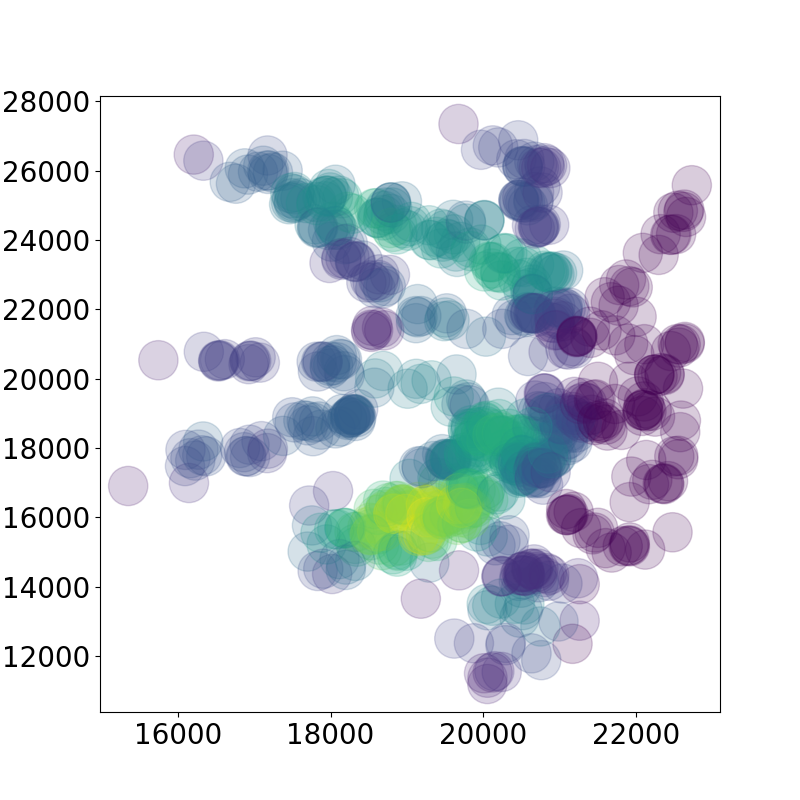

In [16]:
pos_array = np.array(poss)
fig=plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
ax.scatter(pos_array[:,0],pos_array[:,1],s=dist,c=lengths,alpha = 0.2)

In [26]:
np.mean(np.array(lengths)/(np.pi*dist**2)*1000**2

array([  807.40292092,  1046.1419839 ,  3231.15691592,  3866.39643792,
        3866.39643792,  2940.06968103,  5367.85699359,  1100.54307364,
        5367.85699359,   996.58062818,  3780.79047309,  5533.76496586,
        4153.59202177,  8163.91768733,  4304.34582569,  4153.59202177,
        5792.18139817,  6155.18252049,  5868.7838901 ,  6695.72384507,
        6315.56579374,  5126.92586762,  6460.48894885,  5126.92586762,
        3917.51347713,  6460.48894885,  4925.59228509,  5126.92586762,
        6053.61179454,  6717.61304785,  6460.48894885,  4704.95724694,
        5303.01147837,  5490.83444368,  6465.74173488,  4517.46858841,
        5181.46984172,  2777.43104804,  3954.7378451 ,  4193.62317786,
        3487.22459669,  7046.22238194,  7120.94241327,  7777.18152024,
        4797.41984466,  7738.74727913, 10369.44533835,  7952.05683671,
        7426.26921957,  5150.67128538,  7549.88675102,  6926.26969588,
        7777.18152024,  6994.23334337,  8061.08048468,  1991.01877626,
      

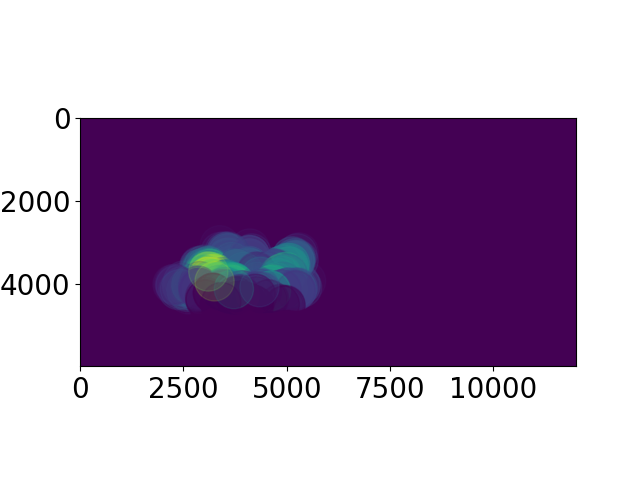

In [25]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(skels[0])
ax.scatter(pos_array[:,1]//5,pos_array[:,0]//5,s=dist,c=np.array(lengths)/(np.pi*dist**2)*1000**2,alpha = 0.2)

In [17]:
num = 10
ts = range(exp.ts)
regular_hulls1,indexes1 = get_regular_hulls(num,exp,ts)
regular_hulls2,indexes2 = get_regular_hulls_area_ratio(num,exp,ts)
regular_hulls3,indexes3 = get_regular_hulls_area_fixed(num,exp,ts,100)

indexes1,indexes2,indexes3

([0, 7, 9, 12, 15, 19, 22, 25, 28, 35],
 [0, 13, 17, 20, 23, 25, 27, 29, 35, 40],
 [0, 9, 12, 14, 16, 18, 19, 21, 22, 23])

In [107]:
num = 20
ts = range(exp.ts)
regular_hulls1,indexes1 = get_regular_hulls(num,exp,ts)
regular_hulls2,indexes2 = get_regular_hulls_area(num,exp,ts)
indexes1,indexes2

([0, 2, 7, 8, 9, 11, 12, 14, 15, 17, 19, 20, 22, 23, 25, 27, 28, 30, 35, 40],
 [0,
  10,
  13,
  15,
  17,
  19,
  20,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  31,
  35,
  39,
  40,
  42])

In [132]:
[ring_area(regular_hulls2[i],regular_hulls2[i+1]) for i in range(len(regular_hulls2)-1)]

[134.5492804809375,
 128.802204478125,
 98.36542606500001,
 120.13737194250001,
 130.60661008781256,
 75.90496073343752,
 158.60474181281256,
 85.8463780528125,
 71.36707160812489,
 130.55955206625003,
 90.03505824281251,
 164.03007836250003,
 87.40329498000006,
 91.98665760656263,
 92.29218436687484,
 136.70710255968766,
 92.85011256656253,
 106.26540395062489,
 92.61447431062516]

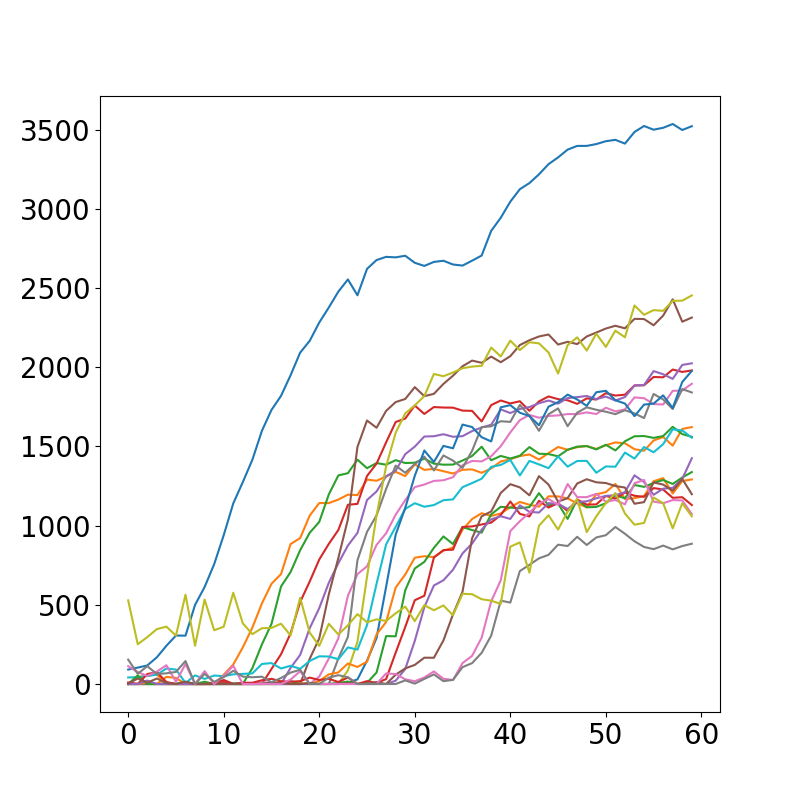

In [108]:
fig=plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
for i in range(len(regular_hulls2)-1):
    hull1,hull2 = regular_hulls2[i],regular_hulls2[i+1]
    lengths = [get_length_in_ring(hull1,hull2,t) for t in range(exp.ts)]
    area= ring_area(hull1,hull2)
    ax.plot(range(exp.ts),np.array(lengths)/area)

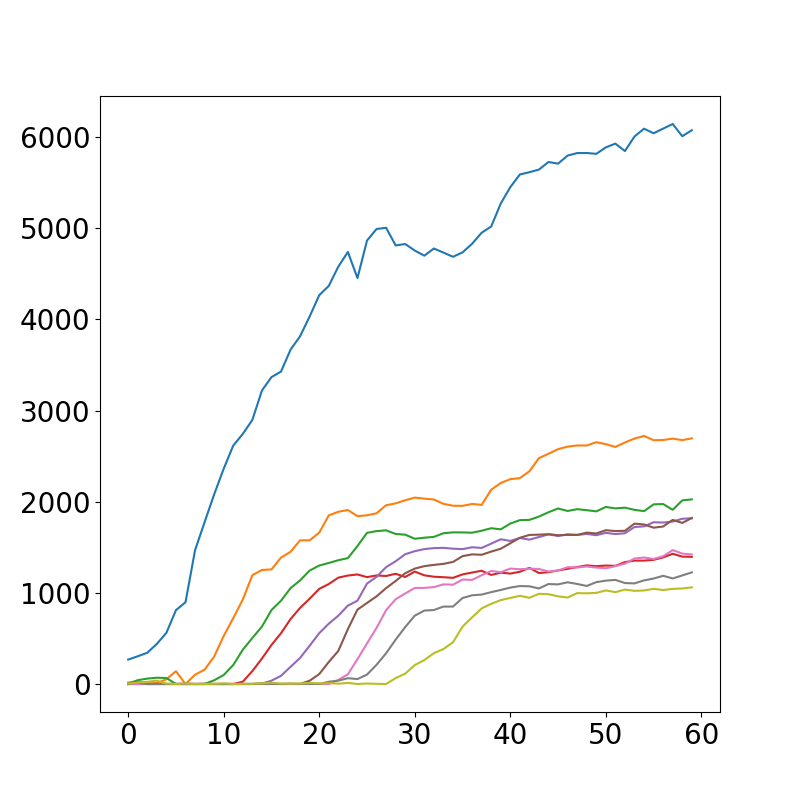

In [105]:
fig=plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
for i in range(len(regular_hulls1)-1):
    hull1,hull2 = regular_hulls1[i],regular_hulls1[i+1]
    lengths = [get_length_in_ring(hull1,hull2,t) for t in range(exp.ts)]
    area= ring_area(hull1,hull2)
    ax.plot(range(exp.ts),np.array(lengths)/area)

In [ ]:
lengths = [get_length_in_ring(hull1,hull2,t) for t in range(exp.ts)]
area= ring_area(hull1,hull2)

In [130]:
t = 50
hull1,hull2 = regular_hulls2[-6],regular_hulls2[-5]
nodes = get_nodes_in_ring(hull1,hull2,t)
nodes_labels = [node.label for node in nodes]

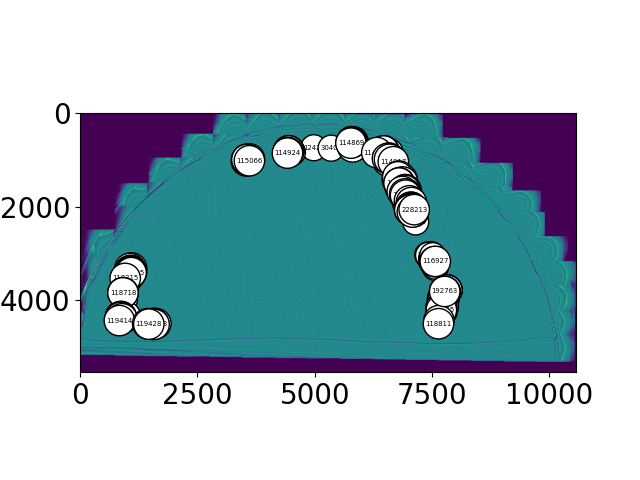

In [131]:
plt.close('all')

plot_raw_plus(exp,t,nodes_labels)

In [127]:
t = 50
hull1,hull2 = regular_hulls2[-9],regular_hulls2[-8]
nodes = get_nodes_in_ring(hull1,hull2,t)
nodes_labels = [node.label for node in nodes]

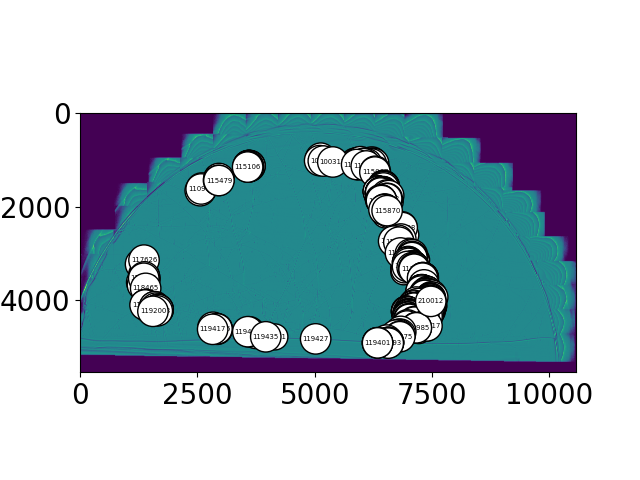

In [128]:
plt.close('all')

plot_raw_plus(exp,t,nodes_labels)

In [ ]:
def get_length_in_study_zone(exp,t,args):
    length=0
    excluded = []
    for edge in exp.nx_graph[t].edges:
        edge_obj= Edge(Node(edge[0],exp),Node(edge[1],exp),exp)
        is_in_end = np.all(is_in_study_zone(edge_obj.end,t,1000,150))
        is_in_begin = np.all(is_in_study_zone(edge_obj.begin,t,1000,150))
        if is_in_end and is_in_begin:
            length+= get_length_um_edge(edge_obj, t)
        else:
            excluded.append(edge_obj)
    print(len(excluded))
    return('tot_length',length)


def get_area(exp,t,args):
    nodes = np.array([node.pos(t) for node in exp.nodes if node.is_in(t)])
    if len(nodes)>0:
        hull=spatial.ConvexHull(nodes)
        poly = Polygon([nodes[vertice] for vertice in hull.vertices])
        area = poly.area* 1.725**2/(1000**2)
    else:
        area=0
    return('area',area)
